<a href="https://colab.research.google.com/github/Nartaj/OLD_MONEY_STORE_made_by_Nartay_Nurgisa_Madi/blob/main/3Mla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/adult.csv", header=None)
df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
    df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('income', axis=1)
y = df['income']
X_scaled = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

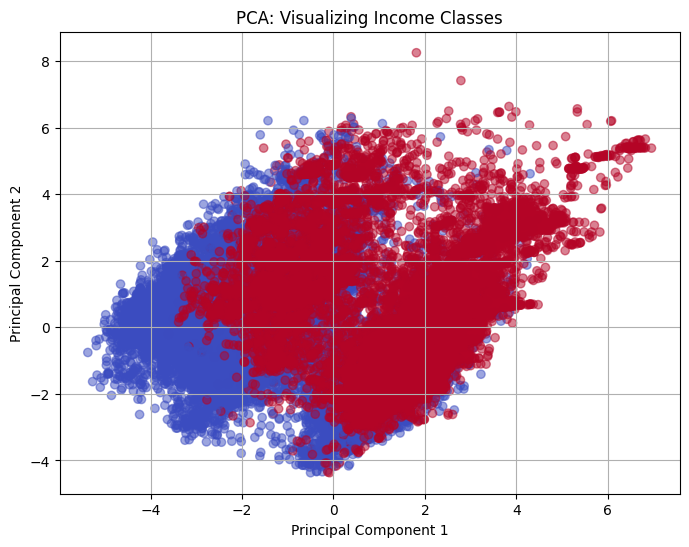

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_resampled, cmap='coolwarm', alpha=0.5)
plt.title('PCA: Visualizing Income Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
print("Размер после очистки:", df.shape)
print("Первые строки:")
print(df.head())

Размер после очистки: (30162, 105)
Первые строки:
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income  workclass_Federal-gov  workclass_Local-gov  workclass_Private  ...  \
0       0                  False                False              False  ...   
1       0                  False                False              False  ...   
2       0                  False                False               True  ...   
3       0                  False                False               True  ...   
4       0                  False                False               True  ...   



In [ ]:
from collections import Counter
print("Форма после one-hot кодирования:", df.shape)
print("Распределение классов после SMOTE:",Counter(y_resampled))

Форма после one-hot кодирования: (30162, 105)
Распределение классов после SMOTE: Counter({0: 22654, 1: 22654})


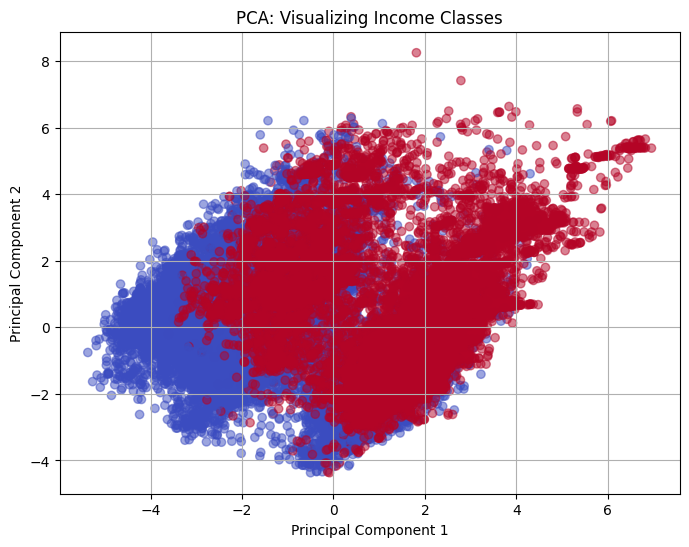

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_resampled, cmap='coolwarm', alpha=0.5)
plt.title('PCA: Visualizing Income Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32557,40,154374,9,0,0,40,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32558,58,151910,9,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32559,22,201490,9,0,0,20,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [26]:
import pandas as pd

df = pd.read_csv('adult.csv', na_values='?')
df.columns = df.columns.str.strip()

print("🔍 Columns in dataset:", df.columns.tolist())


🔍 Columns in dataset: ['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States', '<=50K']


In [27]:
df = pd.read_csv('adult.csv', header=None, na_values='?')



In [28]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
              'marital-status', 'occupation', 'relationship', 'race', 'sex',
              'capital-gain', 'capital-loss', 'hours-per-week',
              'native-country', 'income']


In [29]:
  import pandas as pd
  from sklearn.preprocessing import LabelEncoder

  # Загрузка с заголовками
  df = pd.read_csv('adult.csv', na_values='?')

  # Удалим пробелы из названий
  df.columns = df.columns.str.strip()

  # Проверим, есть ли income
  print(df.columns.tolist())

  # Если income не найден → загрузим без заголовков и зададим их вручную
  if 'income' not in df.columns:
      df = pd.read_csv('adult.csv', header=None, na_values='?')
      df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                    'marital-status', 'occupation', 'relationship', 'race', 'sex',
                    'capital-gain', 'capital-loss', 'hours-per-week',
                    'native-country', 'income']

  # Очистка
  df.dropna(inplace=True)

  # Кодировка целевой переменной
  df['income'] = LabelEncoder().fit_transform(df['income'])

  # One-hot для категориальных колонок
  categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
  df = pd.get_dummies(df, columns=categorical_cols)

  print("✅ Dataset is ready:", df.shape)


['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States', '<=50K']
✅ Dataset is ready: (32561, 109)


In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Загружаем без заголовков
df = pd.read_csv('adult.csv', header=None, na_values='?')

# Названия колонок
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
              'marital-status', 'occupation', 'relationship', 'race', 'sex',
              'capital-gain', 'capital-loss', 'hours-per-week',
              'native-country', 'income']

# Удалим пробелы (на всякий случай)
df.columns = df.columns.str.strip()

# Удалим пропущенные значения
df.dropna(inplace=True)

# Кодируем целевую переменную
df['income'] = LabelEncoder().fit_transform(df['income'])

# Кодируем категориальные признаки
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols)

print("✅ Dataset is ready:", df.shape)


✅ Dataset is ready: (32561, 109)


In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Словарь моделей
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC()
}

# Обучим и сравним
for name, model in models.items():
    print(f"\n📌 Model: {name}")
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)

    print("✅ Classification Report:")
    print(classification_report(y_test, y_pred))



📌 Model: Random Forest
✅ Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4503
           1       0.68      0.73      0.70      1530

    accuracy                           0.84      6033
   macro avg       0.79      0.80      0.80      6033
weighted avg       0.85      0.84      0.84      6033


📌 Model: Logistic Regression
✅ Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4503
           1       0.59      0.84      0.69      1530

    accuracy                           0.81      6033
   macro avg       0.76      0.82      0.78      6033
weighted avg       0.85      0.81      0.82      6033


📌 Model: SVM
✅ Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4503
           1       0.58      0.83      0.68      1530

    accuracy                           